In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.69G/2.70G [00:18<00:00, 174MB/s]
100% 2.70G/2.70G [00:18<00:00, 153MB/s]


In [ ]:
import zipfile
zip = zipfile.ZipFile('/content/new-plant-diseases-dataset.zip')
zip.extractall('/content')
zip.close()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
import os
from PIL import Image
import seaborn as sns
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
BASE_DIR = '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)'

test_dir = os.path.join(BASE_DIR, 'valid')
train_dir = os.path.join(BASE_DIR, 'train')

train_class_dir = [os.path.join(train_dir, d) for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]
test_class_dir = [os.path.join(test_dir, d) for d in os.listdir(test_dir) if os.path.isdir(os.path.join(test_dir, d))]

train_image_paths = []
test_image_paths = []

for class_dir in train_class_dir:
    for file_name in os.listdir(class_dir):
        if file_name.endswith(('.JPG','.jpg','jpeg')):
            image_path = os.path.join(class_dir, file_name)
            train_image_paths.append(image_path)

for class_dir in test_class_dir:
    for file_name in os.listdir(class_dir):
        if file_name.endswith(('.JPG','.jpg','jpeg')):
            image_path = os.path.join(class_dir, file_name)
            train_image_paths.append(image_path)


train_labels = [os.path.basename(class_dir) for class_dir in train_class_dir]
test_labels = [os.path.basename(class_dir) for class_dir in test_class_dir]

In [ ]:
classes_train = os.listdir(train_dir)

classes_train


['Grape___Esca_(Black_Measles)',
 'Apple___Cedar_apple_rust',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Tomato___Leaf_Mold',
 'Pepper,_bell___Bacterial_spot',
 'Apple___Apple_scab',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Strawberry___Leaf_scorch',
 'Apple___healthy',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Soybean___healthy',
 'Potato___Late_blight',
 'Apple___Black_rot',
 'Corn_(maize)___Common_rust_',
 'Potato___Early_blight',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Tomato___Bacterial_spot',
 'Grape___healthy',
 'Strawberry___healthy',
 'Tomato___Tomato_mosaic_virus',
 'Corn_(maize)___healthy',
 'Raspberry___healthy',
 'Pepper,_bell___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Peach___Bacterial_spot',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Potato___healthy',
 'Blueberry___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___healthy',
 'Tomato___Target_Spot',
 'Squash___Powdery_mildew',
 'Tomato___Septoria_leaf_sp

In [ ]:
target_size = (100,100)

batch_size = 64


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)


validation_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [ ]:
train_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [ ]:
class_directories = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]
num_classes = len(class_directories)
num_classes

38

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (100,100,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation = 'relu', padding='same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation = 'relu', padding='same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(128, activation = 'relu'))

model.add(layers.Dropout(0.5))

model.add(layers.Dense(num_classes, activation='softmax'))


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 49, 49, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 24, 24, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 128)       0

In [ ]:
num_epochs = 15
steps_per_epoch = len(train_generator)
validation_steps = len(validation_generator)

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
)

Epoch 1/15
1099/1099 [==============================] - 312s 276ms/step - loss: 2.9524 - accuracy: 0.1541 - val_loss: 1.9564 - val_accuracy: 0.3923
Epoch 2/15
1099/1099 [==============================] - 301s 274ms/step - loss: 1.6405 - accuracy: 0.4895 - val_loss: 1.1942 - val_accuracy: 0.6198
Epoch 3/15
1099/1099 [==============================] - 295s 268ms/step - loss: 1.0487 - accuracy: 0.6740 - val_loss: 0.8073 - val_accuracy: 0.7407
Epoch 4/15
1099/1099 [==============================] - 293s 266ms/step - loss: 0.7478 - accuracy: 0.7695 - val_loss: 0.5284 - val_accuracy: 0.8281
Epoch 5/15
1099/1099 [==============================] - 295s 269ms/step - loss: 0.5640 - accuracy: 0.8258 - val_loss: 0.4339 - val_accuracy: 0.8605
Epoch 6/15
1099/1099 [==============================] - 294s 267ms/step - loss: 0.4523 - accuracy: 0.8625 - val_loss: 0.3541 - val_accuracy: 0.8895
Epoch 7/15
1099/1099 [==============================] - 294s 267ms/step - loss: 0.3904 - accuracy: 0.8809 - val_

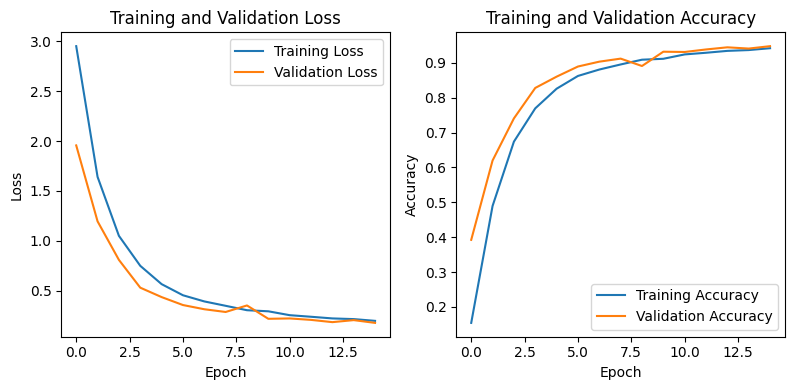

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1, 3, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.models import save_model

model.save('content/model_saved.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model


model = load_model('/content/model_saved.h5')


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

def preprocess_image(img_path):

    img = image.load_img(img_path, target_size=(100,100))

    img_array = image.img_to_array(img)

    img_array = np.expand_dims(img_array, axis=0)

    img_array /= 255.0
    return img_array


In [ ]:
def predict_disease(img_array):

    predictions = model.predict(img_array)

    predicted_class = np.argmax(predictions)
    return predicted_class, predictions[0][predicted_class]


In [ ]:
# Class dictionary as provided
class_dict = {'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3,
              'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6,
              'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8,
              'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11,
              'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14,
              'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17,
              'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20,
              'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24,
              'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27,
              'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___Late_blight': 30, 'Tomato___Leaf_Mold': 31,
              'Tomato___Septoria_leaf_spot': 32, 'Tomato___Spider_mites Two-spotted_spider_mite': 33,
              'Tomato___Target_Spot': 34, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 35, 'Tomato___Tomato_mosaic_virus': 36,
              'Tomato___healthy': 37}

# Reverse the class dictionary to get the class name from index
index_to_class = {v: k for k, v in class_dict.items()}

# Predict disease for a given image path
img_path = '/content/Grape Leaf Blight.jpeg'
img_array = preprocess_image(img_path)
predicted_class_index, confidence = predict_disease(img_array)
predicted_class_name = index_to_class[predicted_class_index]

print(f"Predicted disease: {predicted_class_name} with confidence: {confidence}")


1/1 [==============================] - 0s 17ms/step
Predicted disease: Grape___Leaf_blight_(Isariopsis_Leaf_Spot) with confidence: 1.0
